In [1]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Part 1: Prepare the Data

In [3]:
# reading the csv file
myopia_df =  pd.read_csv("Resources/myopia.csv")
myopia_df.head() 

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# remove Myopic column
myopia_df2= myopia_df.drop(["MYOPIC"], axis=1)
myopia_df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
myopia_df2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [6]:
# Standardize the dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
myopia_scaled = StandardScaler().fit_transform(myopia_df2)
print(myopia_scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


# Part 2: Apply Dimensionality Reduction

In [7]:
# Perform dimensionality reduction with PCA preserving 90% of the explained variance ( n_components=0.90)
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [8]:
myopia_pca.shape

(618, 10)

In [9]:
# Transform PCA data to a DataFrame
myopia_df_pca = pd.DataFrame(data=myopia_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7","principal component 8",
                                                                 "principal component 9","principal component 10"])
myopia_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [10]:
myopia_df_pca.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'principal component 4',
       'principal component 5', 'principal component 6',
       'principal component 7', 'principal component 8',
       'principal component 9', 'principal component 10'],
      dtype='object')

In [11]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [12]:
# Further reduce the dataset dimensions with t-SNE

# Initialize t-SNE model
tsne = TSNE(learning_rate = 50)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

# The dataset has 2 columns
tsne_features.shape

C:\Users\npeik\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

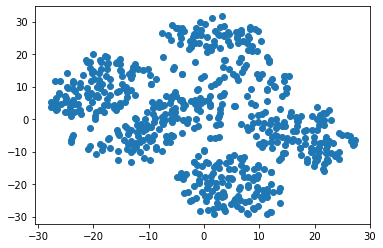

In [13]:
# Prepare to plot the dataset

# The first column of transformed features
myopia_df2["x"] = tsne_features[:,0]

# The second column of transformed features
myopia_df2["y"] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(myopia_df2["x"],myopia_df2["y"])
plt.show()

In [14]:
labels = myopia_df["MYOPIC"]
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

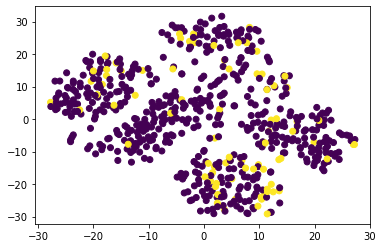

In [15]:
# Visualize the clusters with color
plt.scatter(myopia_df2["x"],myopia_df2["y"], c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [16]:
# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


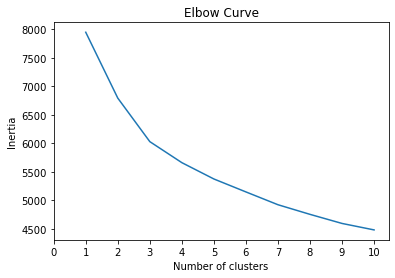

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [19]:
clusters = get_clusters(3, myopia_df_pca)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,1
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,1
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,0


In [20]:
def show_clusters(df):
    plt.scatter(df['principal component 1'], df['principal component 2'], c=df['class'])
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.title("Myopia clusters")
    plt.show()

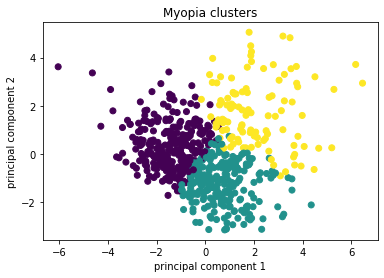

In [21]:
show_clusters(clusters)

# Part 4: Make a Recommendation

After reducing the dataset variables from 14 to 2 and creating the elbow plot, it appears that k-means elbow for inertia is at 3 with a posibility of having three groups of clusters. 
